In [1]:
from dotenv import load_dotenv
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine, text

from PoissonRegression import PoissonRegressionAlgo

In [2]:
load_dotenv() 
connection_string = os.getenv('DB_CONNECTION_STRING')


# Establish the connection
engine = create_engine(connection_string)

stored_procedure = text("EXEC GetPoissonSimTable")

with engine.connect() as connection:
    result = connection.execute(stored_procedure)
    poisson_df = pd.DataFrame(result.fetchall())

In [3]:
poisson_df = poisson_df[["num_awards","prog","math"]].astype(float)
poisson_df.columns

Index(['num_awards', 'prog', 'math'], dtype='object')

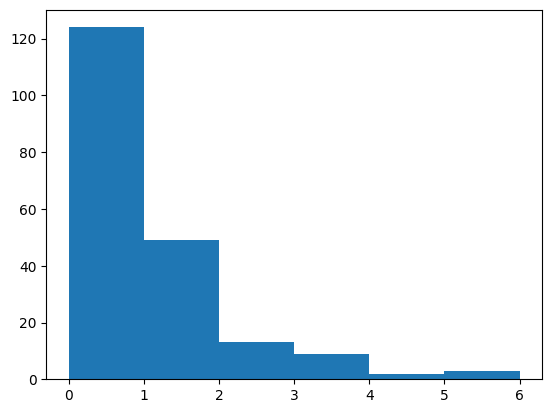

In [4]:
plt.hist(poisson_df['num_awards'], bins=6);

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poisson_df[['prog', 'math']], poisson_df["num_awards"], random_state=46, test_size=0.2)
poisson_model = PoissonRegressionAlgo()
poisson_model.fit(np.array(X_train), np.array(y_train))
poisson_pred = poisson_model.predict(np.array(X_test))

In [6]:
poisson_pred

array([0.99545101, 0.75979417, 0.48306995, 1.26563314, 0.45492315,
       1.81922238, 1.47057711, 0.56129347, 1.38855106, 1.05704111,
       1.561564  , 1.26563314, 0.39152371, 1.71322264, 0.93744955,
       0.48306995, 1.1566444 , 0.54469576, 1.43086232, 1.19188911,
       1.60914723, 1.51939199, 1.66256185, 0.78294625, 1.99064478,
       0.67205675, 1.19503848, 1.12540775, 0.71363794, 1.26897736,
       0.78294625, 1.3041989 , 0.7808829 , 1.76077458, 0.96601507,
       0.80467759, 0.46878535, 1.26897736, 0.48306995, 1.19188911])